In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# Признаки (X)
X = diabetes.data
# Целевая переменная (y)
y = diabetes.target

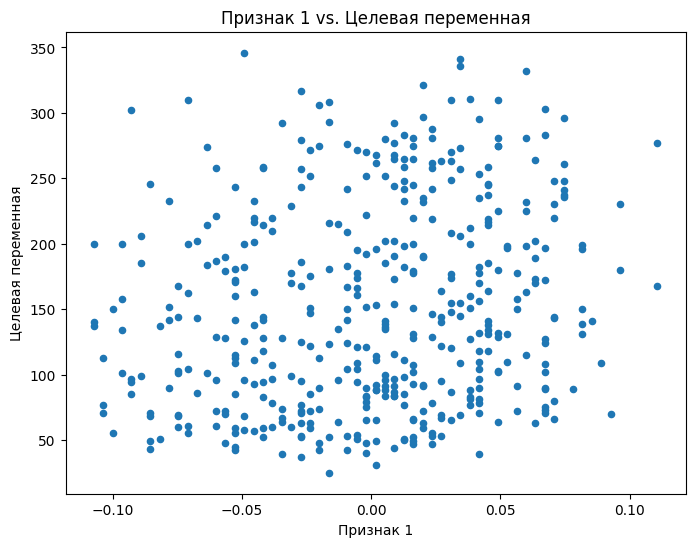

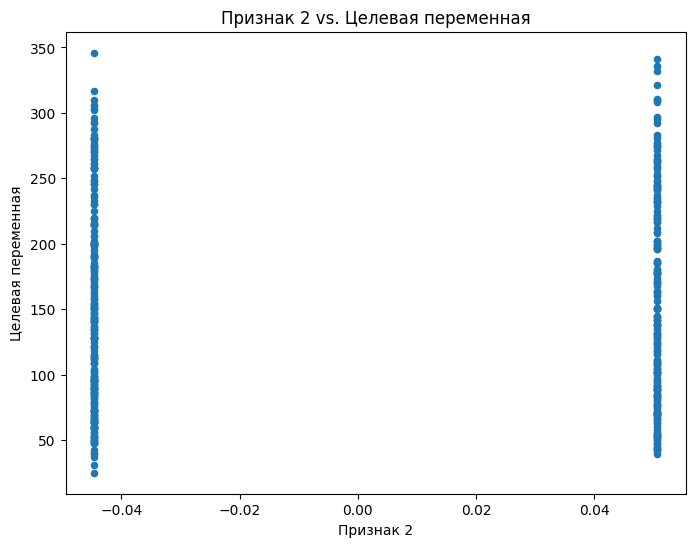

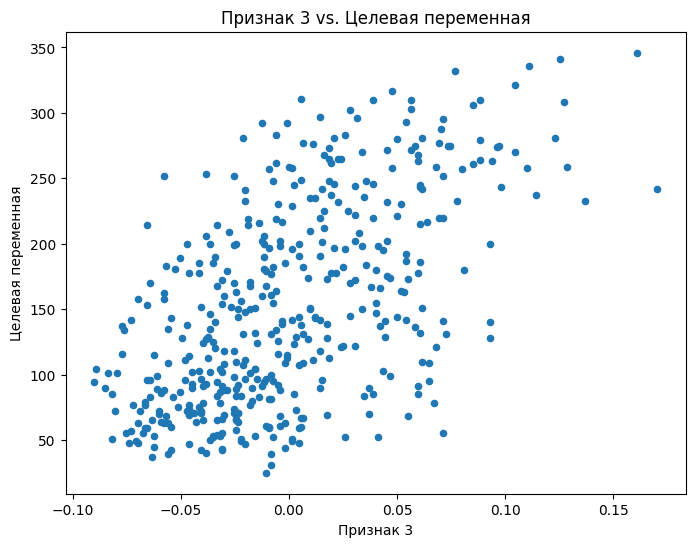

In [4]:
# Визуализация первых трех признаков
for feature_index in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_index], y, s=20)
    plt.title(f"Признак {feature_index + 1} vs. Целевая переменная")
    plt.xlabel(f"Признак {feature_index + 1}")
    plt.ylabel("Целевая переменная")
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Создание и обучение модели KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# Предсказание значений на всем датасете для визуализации
y_pred = knn_regressor.predict(X)

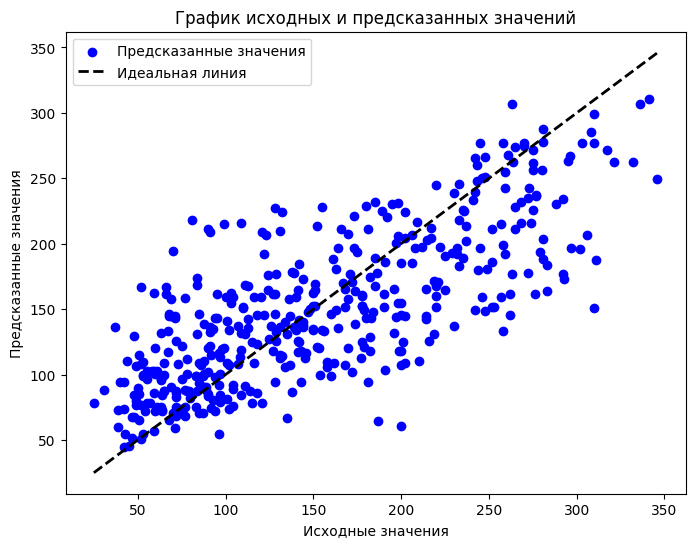

In [8]:
# Построение графика с исходными значениями и предсказанными значениями
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='b', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.title('График исходных и предсказанных значений')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import r2_score

# Предсказание значений на тестовом наборе данных
y_pred_test = knn_regressor.predict(X_test)

# Предсказание значений на тренировочном наборе данных
y_pred_train = knn_regressor.predict(X_train)

# Оценка качества модели на тестовых данных с использованием R^2
r2_test = r2_score(y_test, y_pred_test)
print("R^2 на тестовом наборе данных: {:.2f}".format(r2_test))

# Оценка качества модели на тренировочных данных с использованием R^2
r2_train = r2_score(y_train, y_pred_train)
print("R^2 на тренировочном наборе данных: {:.2f}".format(r2_train))

R^2 на тестовом наборе данных: 0.36
R^2 на тренировочном наборе данных: 0.64


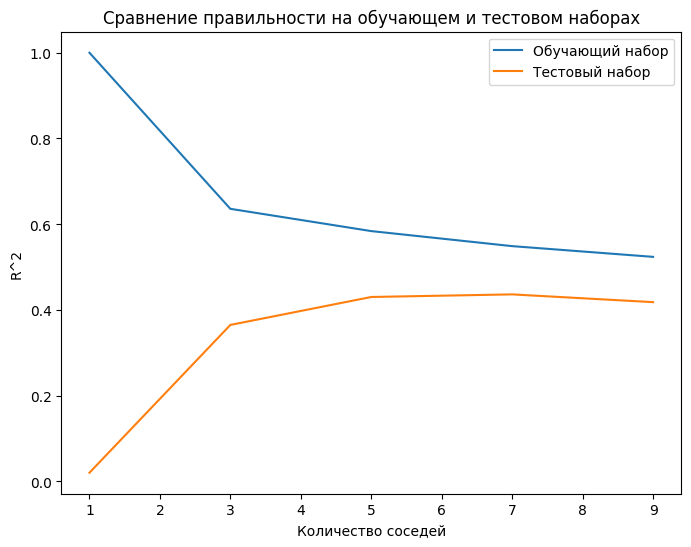

In [10]:
# Разные значения количества соседей
n_neighbors = [1, 3, 5, 7, 9]

train_scores = []
test_scores = []

for k in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, train_scores, label='Обучающий набор')
plt.plot(n_neighbors, test_scores, label='Тестовый набор')
plt.xlabel('Количество соседей')
plt.ylabel('R^2')
plt.title('Сравнение правильности на обучающем и тестовом наборах')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров для настройки
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Разное количество соседей
    'weights': ['uniform', 'distance'],  # Веса соседей
}

# Поиск наилучших параметров с помощью кросс-валидации
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Создание и обучение модели KNeighborsRegressor с наилучшими параметрами
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors, weights=best_weights)
best_knn_regressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
knn_predictions = best_knn_regressor.predict(X_test)

# Оценка качества модели
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("Наилучшие параметры:")
print("Количество соседей:", best_n_neighbors)
print("Веса соседей:", best_weights)
print("MSE:", knn_mse)
print("R^2:", knn_r2)

Наилучшие параметры:
Количество соседей: 11
Веса соседей: distance
MSE: 2951.295312575387
R^2: 0.46628193977662447


In [33]:
print("R^2 на тестовом наборе:{:.2f}".format(knn_regressor.score(X_test, y_test)))

R^2 на тестовом наборе:0.47


<h3>Линейная модель регрессии (метод наименьших квадратов)</h3>

In [15]:
from sklearn.linear_model import LinearRegression
# Создание и обучение модели Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
print("lr.coef:{}".format(lr_model.coef_))
print("lr.intercept_: {}".format(lr_model.intercept_))

lr.coef:[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept_: 151.6651755919933


In [20]:
print("Правильность на обучающем наборе:{:.2f}".format(lr_model.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.2f}".format(lr_model.score(X_test, y_test)))

Правильность на обучающем наборе:0.52
Правильность на тестовом наборе:0.48


In [37]:
# Предсказание на тестовой выборке
lr_predictions = lr_model.predict(X_test)
# Оценка качества модели
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("MSE:", lr_mse)
print("R^2:", lr_r2)

MSE: 2848.3106508475043
R^2: 0.4849058889476757


<h3>Гребневая регрессия</h3>

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе:0.43
Правильность на тестовом наборе:0.44


In [39]:
ridge10= Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе:0.15
Правильность на тестовом наборе:0.16


In [40]:
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе:0.51
Правильность на тестовом наборе:0.49


In [41]:
# Определение сетки параметров для настройки
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Разные значения параметра регуляризации alpha
}

# Поиск наилучших параметров с помощью кросс-валидации
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Получение наилучших параметров
best_alpha = grid_search.best_params_['alpha']

# Создание и обучение модели Ridge регрессии с наилучшими параметрами
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
ridge_predictions = best_ridge_model.predict(X_test)

# Оценка качества модели
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Наилучший параметр alpha:", best_alpha)
print("MSE:", ridge_mse)
print("R^2:", ridge_r2)

Наилучший параметр alpha: 0.01
MSE: 2836.4072408955885
R^2: 0.48705852506054115


<h3>Лассо</h3>

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе:{:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ !=0)))

Правильность на обучающем наборе:0.35
Правильность на контрольном наборе:0.38
Количество использованных признаков: 3


In [52]:
#Мы увеличиваем значение "max_iter",
#иначе модель выдаст предупреждение, что нужно увеличить max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на контрольном наборе:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ !=0)))

Правильность на обучающем наборе:0.52
Правильность на контрольном наборе:0.49
Количество использованных признаков: 10


In [53]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на контрольном наборе:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ !=0)))

Правильность на обучающем наборе:0.52
Правильность на контрольном наборе:0.48
Количество использованных признаков: 10
